In [31]:
from gensim.models import Word2Vec
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import os

root_dir = Path(os.path.abspath("__file__")).parent
dataset_dir = root_dir / "data"
ids_file_dir = dataset_dir / "ids.tsv"
dic_dir = dataset_dir / "cedict_ts.u8"
pickle_dir = root_dir / "pickle"

with open(pickle_dir / 'atoms.pickle', 'rb') as f:
    atoms = pickle.load(f)

with open(pickle_dir / 'nonatoms_decomposed.pickle', 'rb') as f:
    nonatoms_decomposed = pickle.load(f)

# tokens = [['U+2FF0', '⿰', '⿰'],
#           ['U+2FF1', '⿱', '⿱'],
#           ['U+2FF2', '⿲', '⿲'],
#           ['U+2FF3', '⿳', '⿳'],
#           ['U+2FF4', '⿴', '⿴'],
#           ['U+2FF5', '⿵', '⿵'],
#           ['U+2FF6', '⿶', '⿶'],
#           ['U+2FF7', '⿷', '⿷'],
#           ['U+2FF8', '⿸', '⿸'],
#           ['U+2FF9', '⿹', '⿹'],
#           ['U+2FFA', '⿺', '⿺'],
#           ['U+2FFB', '⿻', '⿻']] 

sentences = []
# for ids in atoms[:,2]:
#     sentences.append([hex(ord(c)) for c in ids])
for ids in nonatoms_decomposed[:,2]:
    sentences.append([hex(ord(c)) for c in ids])

# for row in atoms:
#     sentences.append(list(row[0]))
# for row in decomposed:
#     for u in list(row[2]):
#     sentences.append(list(row[2]))

model = Word2Vec(sentences, window=3, min_count=1, workers=1)
word_vectors = model.wv

vocabs = word_vectors.index_to_key
word_vectors_list = [word_vectors[v] for v in vocabs]

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

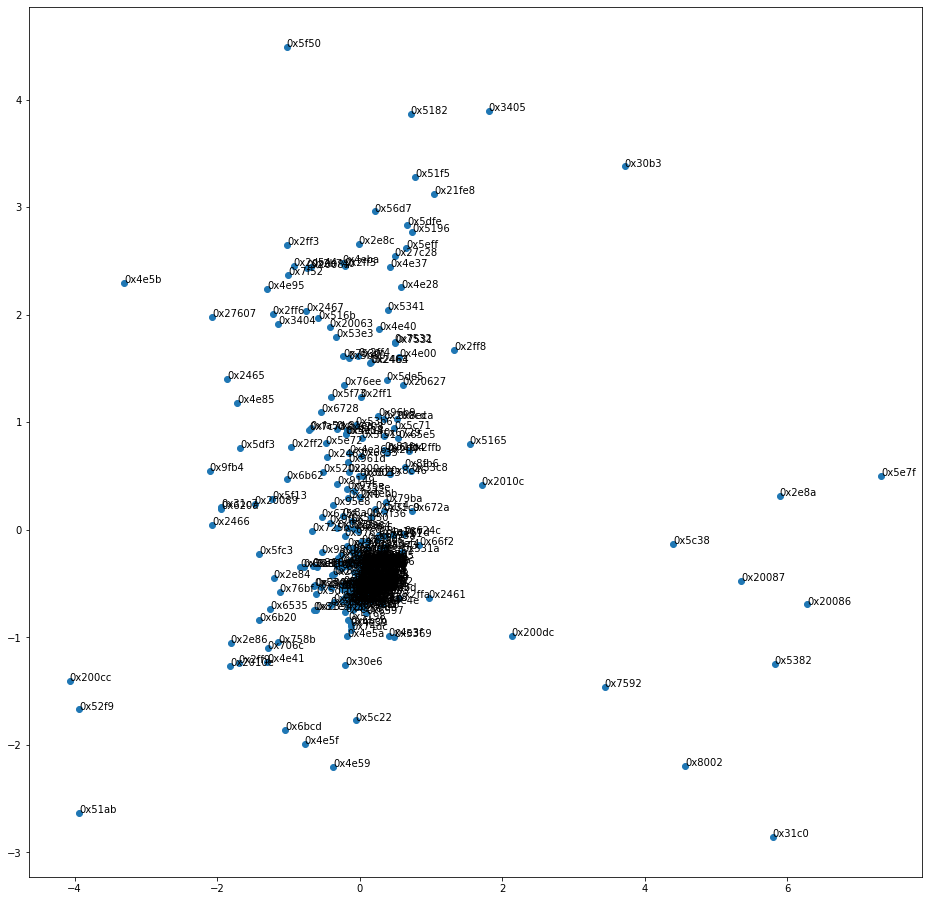

In [33]:
plt.figure(figsize=(16,16))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))
plt.show()

In [34]:
from itertools import chain
from itertools import combinations

sentences_list = list(chain(*sentences))
sentences_set = set(sentences_list)

print(f"sentences_list {len(sentences)}")
print(f"sentences_set {len(sentences_set)}")

similarity_dict = {}
combi = list(combinations(sentences_set, 2))
for w1, w2 in combi:
    similarity_dict[(w1, w2)] = word_vectors.similarity(w1, w2)

sentences_list 88480
sentences_set 369


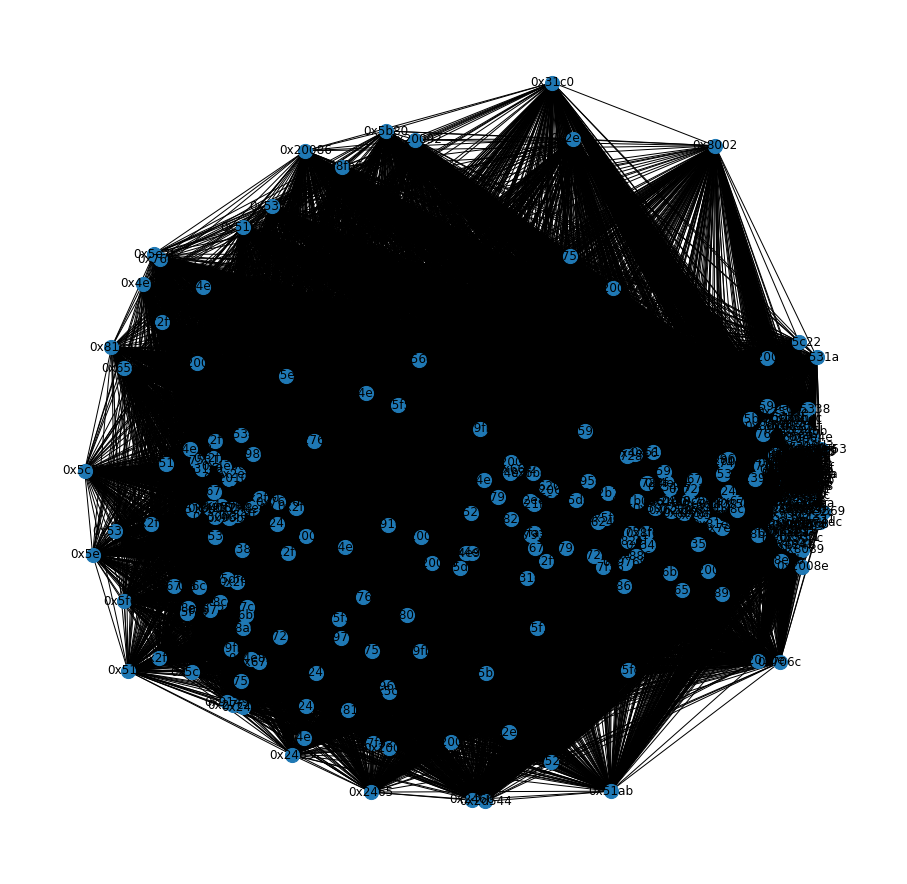

In [35]:
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
for k, v in similarity_dict.items():
    G.add_edge(k[0], k[1], weight=v)

pos = nx.spring_layout(G)
plt.figure(figsize=(16,16))
nx.draw_networkx(G, pos, node_size=200)
plt.axis('off')
plt.show()